In [1]:
import os
os.chdir("../..")

In [2]:
import omegaconf
from shell.utils.experiment_utils import *
from shell.utils.metric import *
import matplotlib.pyplot as plt
from shell.fleet.network import TopologyGenerator
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
from shell.fleet.fleet import Agent, Fleet
from shell.fleet.grad.gradient_fleet import GradFleet
from shell.fleet.data.data_utilize import *
from shell.fleet.data.send import *
from shell.fleet.grad.monograd import *

from sklearn.manifold import TSNE
from torchvision.utils import make_grid
import logging
logging.basicConfig(level=logging.INFO)

In [3]:
seed_everything(0)

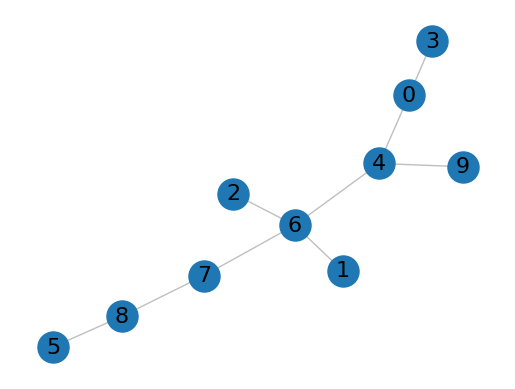

In [4]:
topo_gen = TopologyGenerator(num_nodes=10, edge_drop_prob=0.99)
G_connected_random = topo_gen.generate_connected_random()
TopologyGenerator.plot_graph(G_connected_random, draw_labels=True)

In [5]:
use_contrastive = True
num_tasks = 5
num_init_tasks = 3
dataset_name = "mnist"
num_epochs = 20
com_frequency = 5

In [6]:
data_cfg = {
    "dataset_name": dataset_name,
    "num_tasks": num_tasks,
    "num_train_per_task": 128,
    "num_val_per_task": 102,
    'remap_labels': True,
    'use_contrastive': use_contrastive,
}

joint_dataset = get_dataset(**data_cfg)

dataset = get_dataset(**data_cfg)
dataset2 = get_dataset(**data_cfg)
dataset3 = get_dataset(**data_cfg)

INFO:root:Class sequence: [6 4 1 5 3 7 0 8 9 2]
INFO:root:task 0 :(128, 1, 28, 28)
INFO:root:task 1 :(128, 1, 28, 28)
INFO:root:task 2 :(128, 1, 28, 28)
INFO:root:task 3 :(128, 1, 28, 28)
INFO:root:task 4 :(128, 1, 28, 28)
INFO:root:Class sequence: [4 3 0 2 7 5 1 8 6 9]
INFO:root:task 0 :(128, 1, 28, 28)
INFO:root:task 1 :(128, 1, 28, 28)
INFO:root:task 2 :(128, 1, 28, 28)
INFO:root:task 3 :(128, 1, 28, 28)
INFO:root:task 4 :(128, 1, 28, 28)
INFO:root:Class sequence: [3 2 6 7 4 5 8 0 1 9]
INFO:root:task 0 :(128, 1, 28, 28)
INFO:root:task 1 :(128, 1, 28, 28)
INFO:root:task 2 :(128, 1, 28, 28)
INFO:root:task 3 :(128, 1, 28, 28)
INFO:root:task 4 :(128, 1, 28, 28)
INFO:root:Class sequence: [4 0 1 5 9 2 6 3 7 8]
INFO:root:task 0 :(128, 1, 28, 28)
INFO:root:task 1 :(128, 1, 28, 28)
INFO:root:task 2 :(128, 1, 28, 28)
INFO:root:task 3 :(128, 1, 28, 28)
INFO:root:task 4 :(128, 1, 28, 28)


In [ ]:
net_cfg = {
    'depth': num_init_tasks,
    'layer_size': 64,
    'num_init_tasks': num_init_tasks,
    'i_size': 28,
    'num_classes': 2,
    'num_tasks': 4,
    'dropout': 0.0,
}

agent_cfg = {
    'memory_size': 64,
    'use_contrastive': use_contrastive,
    'save_dir': 'test',
    'dataset_name': dataset_name,
}

In [ ]:
NetCls = MLP
LearnerCls = NoComponentsER

# NetCls = MLPSoftLLDynamic
# LearnerCls = CompositionalDynamicER

AgentCls = ModelSyncAgent
sharing_cfg = DictConfig({
    'num_coms_per_round': 1,
    "comm_freq": com_frequency,
    "log_freq": 1,

})
train_cfg = {
    "num_epochs": num_epochs,
}

In [ ]:
datasets = [dataset, dataset2, dataset3]
g = TopologyGenerator(num_nodes=len(datasets)).generate_fully_connected()
fleet = GradFleet(g, 0, datasets,
              sharing_cfg, AgentCls, NetCls, LearnerCls, net_cfg, agent_cfg, 
              train_cfg,
              joint_dataset)

In [ ]:
fleet.train_and_comm(0)

In [ ]:
fleet.agents[0].net.components[0].bias

In [ ]:
fleet.agents[2].net.components[0].bias

In [ ]:
# original_num_epochs = 100
# communication_frequency = 100


# def communicate():
#     print('commute')
# for start_epoch in range(0, original_num_epochs, communication_frequency):
#     end_epoch = min(start_epoch + communication_frequency, original_num_epochs)
#     adjusted_num_epochs = end_epoch - start_epoch  # adjust num_epochs
#     print(start_epoch, end_epoch, adjusted_num_epochs)
#     communicate()